In [307]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [308]:
import os

path ="/root/.cache/kagglehub/datasets/rjmanoj/credit-card-customer-churn-prediction/versions/1"
os.listdir(path)

['Churn_Modelling.csv']

In [309]:
path = "/root/.cache/kagglehub/datasets/rjmanoj/credit-card-customer-churn-prediction/versions/1/Churn_Modelling.csv"

df = pd.read_csv(path)

print(df.shape)

(10000, 14)


In [310]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [311]:
print("Number of Duplicates:", df.duplicated().sum())

df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

print(df.shape)

Number of Duplicates: 0
(10000, 11)


In [312]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first=True)

In [313]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [314]:
X = df.drop(columns = 'Exited')
y = df['Exited']

In [315]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [316]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


(8000, 11)
(8000,)
(2000, 11)
(2000,)


In [317]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [318]:
X_t = torch.tensor(X_train, dtype=torch.float32)
y_t = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)


In [319]:
import torch 
import torch.nn as nn

In [320]:
model = nn.Sequential(
    nn.Linear(11,3),
    nn.ReLU(),
    nn.Linear(3,1),
    nn.Sigmoid(),
)

print(model)

lossfun = nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr = 0.25)


Sequential(
  (0): Linear(in_features=11, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=1, bias=True)
  (3): Sigmoid()
)


In [321]:
epochs = 5000
losses = np.zeros(epochs)

for i in range(epochs):
    model.train()
    
    yHat = model(X_t)
    loss = lossfun(yHat,y_t)

    losses[i] = loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


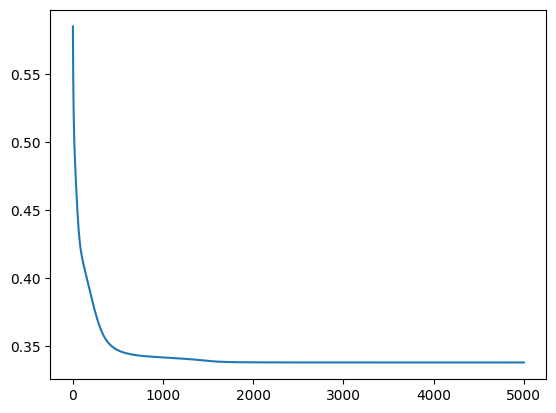

In [322]:
plt.plot(losses)

In [323]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0822, -0.4248, -0.0656,  0.4162,  1.5937, -0.0090, -0.7431, -0.0324,
                       -0.0594,  0.0452, -0.0750],
                      [ 0.0858, -1.1615, -0.0583,  0.0032,  0.0051,  0.0046, -0.5586, -0.0043,
                       -0.0430, -0.0590,  0.0711],
                      [ 0.0211, -0.4234, -0.0751, -0.2058, -1.7590,  0.0018, -0.7050,  0.0194,
                        0.2228, -0.0448, -0.0500]])),
             ('0.bias', tensor([0.2532, 1.6224, 0.5951])),
             ('2.weight', tensor([[ 1.8101, -2.0433,  2.0163]])),
             ('2.bias', tensor([-2.2049]))])

In [337]:
from sklearn.metrics import confusion_matrix as cm

model.eval()
with torch.no_grad():
    y_pred_prob = model(X_test_t)

y_pred_class = (y_pred_prob >= 0.5).float()

print(cm(y_test_t, y_pred_class))

[[1516   79]
 [ 198  207]]
